# Sage Shaw

### ME 571 - Spring 2018

# HW 2 - Problem 2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import timeit

In [9]:
%%bash
mpicc demo_util.c p3b.c -o p3b -lm
mpirun -n 16 ./p3b -p 17 > results.csv
head results.csv

In [11]:
def generate_solution(procs, power):
    file = open("results.csv", "w")
    subprocess.run( ['mpirun','-n', str(procs), './p3b','-p',str(power)],stdout=file)
    file.close()
    return np.genfromtxt('results.csv', delimiter=',')

1 loop, best of 1: 63.3 ms per loop


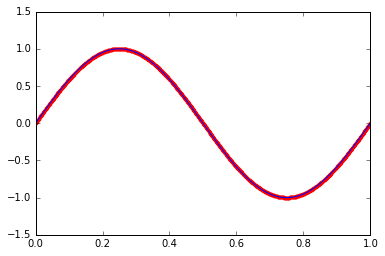

In [10]:
file = open("results.csv", "w")
tr = %timeit -n 1 -r 1 -o w = p = subprocess.run( ['mpirun','-n', str(16), './p3b','-p',str(10)],stdout=file)
file.close()
A = np.genfromtxt('results.csv', delimiter=',')

#A, time = generate_solution(16, 10)
x = A[:,0]
u = A[:,1]
plt.plot(x,u,'r.')
plt.plot(x,np.sin(2*np.pi*x),'b-')

We can visually verify the accuracy of our implementation in the plot above. For a more precise approach we plot the error for several values of $N$ in the plot below.

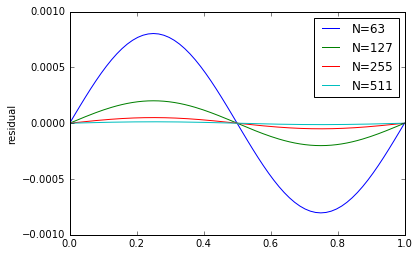

In [13]:
for i in range(6,10):
    N = 2**i-1
    A = generate_solution(1, i)
    x = A[:,0]
    u = A[:,1]
    plt.plot(x,u-np.sin(2*np.pi*x), label='N='+str(N))
plt.legend()
plt.ylabel('residual')

## Scaling Results

In [80]:
#generate data
data = {}
columns = ['Processors', 'Time', 'Error']

for procs in [1, 2, 4, 8, 16]:
    df = pd.DataFrame(columns=columns)
    for power in range(6, 15):
        file = open("results.csv", "w")
        tr = %timeit -n 1 -r 1 -o w = p = subprocess.run( ['mpirun','-n', str(procs), './p3b','-p',str(power)],stdout=file)
        file.close()
        A = np.genfromtxt('results.csv', delimiter=',')
        x = A[:,0]
        u = A[:,1]
        error = np.linalg.norm(u - np.sin(2*np.pi*x))
        data_row = {'Processors': procs, 'Time': tr.best, 'Error':error}
        df = df.append(pd.Series(data=data_row, name=2**power-1))
    data['p' + '{:02d}'.format(procs) ] = df
panel = pd.Panel(data)

1 loop, best of 1: 17.4 ms per loop
1 loop, best of 1: 17.5 ms per loop
1 loop, best of 1: 16.6 ms per loop
1 loop, best of 1: 36.5 ms per loop
1 loop, best of 1: 102 ms per loop
1 loop, best of 1: 325 ms per loop
1 loop, best of 1: 1.09 s per loop
1 loop, best of 1: 4.34 s per loop
1 loop, best of 1: 17.5 s per loop
1 loop, best of 1: 15.6 ms per loop
1 loop, best of 1: 17.5 ms per loop
1 loop, best of 1: 20.8 ms per loop
1 loop, best of 1: 28.6 ms per loop
1 loop, best of 1: 49.5 ms per loop
1 loop, best of 1: 161 ms per loop
1 loop, best of 1: 617 ms per loop
1 loop, best of 1: 2.4 s per loop
1 loop, best of 1: 9.59 s per loop
1 loop, best of 1: 22.6 ms per loop
1 loop, best of 1: 18.8 ms per loop
1 loop, best of 1: 17.7 ms per loop
1 loop, best of 1: 24.5 ms per loop
1 loop, best of 1: 44.1 ms per loop
1 loop, best of 1: 112 ms per loop
1 loop, best of 1: 370 ms per loop
1 loop, best of 1: 1.27 s per loop
1 loop, best of 1: 4.8 s per loop
1 loop, best of 1: 17.6 ms per loop
1 loop,

In [83]:
panel['p01']

,Processors,Time,Error
63,1.0,0.017377,0.004546
127,1.0,0.017461,0.001607
255,1.0,0.016560,0.000568
511,1.0,0.036499,0.000201
1023,1.0,0.101845,0.000071
2047,1.0,0.324740,0.000025
4095,1.0,1.090265,0.000009
8191,1.0,4.335785,0.000003
16383,1.0,17.452235,0.000001


In [84]:
panel.minor_xs('Time')

,p01,p02,p04,p08,p16
63,0.017377,0.015570,0.022567,0.017596,0.060297
127,0.017461,0.017522,0.018811,0.019031,0.054467
255,0.016560,0.020785,0.017688,0.019102,0.028864
511,0.036499,0.028624,0.024545,0.031225,0.036009
1023,0.101845,0.049472,0.044118,0.034283,0.154181
2047,0.324740,0.160527,0.112224,0.058383,0.229989
4095,1.090265,0.617139,0.370001,0.194967,0.582872
8191,4.335785,2.396508,1.268844,0.737855,1.762087
16383,17.452235,9.589971,4.799966,2.530233,4.140065
